In [1]:
!py -3.9 -m pip install xarray

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Column descriptions: 
- a1 - f7: ID of wind turbine
- connect: Number of wind turbines connected
- wsn: Wind Speed
- ym: Yaw Angle
- pow: Active Power

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/master/norre_m2.md

https://data.dtu.dk/articles/dataset/SCADA_data_from_Norre_m2_wind_farm/19076756

In [3]:
import xarray as xr
import pandas as pd

In [4]:
# Open the .nc file
ds = xr.open_dataset("C:/Users/leopu/OneDrive/Programming/Python/danish-turbine-prediction/norre_m2_all.nc")

# Convert the Dataset into a DataFrame
df = ds.to_dataframe()

In [5]:
ds

<xarray.Dataset>
Dimensions:     (time: 72577)
Coordinates:
  * time        (time) datetime64[ns] 1991-12-22T23:36:00 ... 1993-06-27T23:1...
Data variables: (12/260)
    connect     (time) float64 42.0 42.0 42.0 42.0 42.0 ... 19.0 12.0 8.0 5.0
    connect_qc  (time) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    d31_1       (time) float64 257.4 259.6 260.1 255.6 253.0 ... nan nan nan nan
    d31_1_qc    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    d34_2       (time) float64 253.6 255.8 257.1 254.1 252.2 ... nan nan nan nan
    d34_2_qc    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ...          ...
    f7_pow      (time) float64 113.5 98.9 78.6 113.8 128.9 ... nan nan nan nan
    f7_pow_qc   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    f7_wsn      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    f7_wsn_qc   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    f7_ym       (time) float64 -9.38 -9.68 -5.21 -8.5 -5.75 ... nan nan nan nan
    f7_ym_qc    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
Attributes: (12/26)
    title:                   Wind farm data from Norrekaer Enge, DK
    authors:                 Kurt Schaldemose Hansen, Nikola Vasiljević and S...
    summary:                 This dataset includes SCADA data and mast measur...
    comment:                 
    history:                 2022-01-27T10:49:35\tUpdated metadata informatio...
    institution:             DTU Wind Energy
    ...                      ...
    featureType:             trajectoryProfile
    cdm_data_type:           Trajectory
    date_create:             2022-01-27T10:49:35
    date_update:             2022-01-27T10:49:35
    data_mode:               Mixed
    source:                  physical

In [18]:
df.head()

,connect,connect_qc,d31_1,d31_1_qc,d34_2,d34_2_qc,park,park_qc,s31_1,s31_1_qc,...,f6_ym_qc,f7_pow,f7_pow_qc,f7_wsn,f7_wsn_qc,f7_ym,f7_ym_qc,month_of_year,day_of_year,hour_of_day
time,,,,,,,,,,,,,,,,,,,,,
1991-12-22 23:36:00,42.0,0,257.41,0.0,253.61,0.0,5253.5,0,10.61,0.0,...,0.0,113.5,0.0,NaN,NaN,-9.38,0.0,12,356,23
1991-12-22 23:46:00,42.0,0,259.57,0.0,255.78,0.0,5012.9,0,10.69,0.0,...,0.0,98.9,0.0,NaN,NaN,-9.68,0.0,12,356,23
1991-12-22 23:56:00,42.0,0,260.11,0.0,257.12,0.0,4272.9,0,9.91,0.0,...,0.0,78.6,0.0,NaN,NaN,-5.21,0.0,12,356,23
1991-12-23 00:06:00,42.0,0,255.64,0.0,254.12,0.0,5253.9,0,10.85,0.0,...,0.0,113.8,0.0,NaN,NaN,-8.50,0.0,12,357,0
1991-12-23 00:16:00,42.0,0,252.99,0.0,252.15,0.0,5740.6,0,11.18,0.0,...,0.0,128.9,0.0,NaN,NaN,-5.75,0.0,12,357,0


In [32]:
df["month_of_year"] = [df.index[i].month for i in range(len(df.index))]
df["day_of_year"] = [df.index[i].day_of_year for i in range(len(df.index))]
df["hour_of_day"] = [df.index[i].hour for i in range(len(df.index))]

In [36]:
cols_to_keep = ["a2_pow", "a2_wsn", "a2_ym", "month_of_year", "day_of_year", "hour_of_day"]

In [37]:
a2_df = df[cols_to_keep]

cols_to_drop = [c for c in a2_df.columns if "qc" in c]
a2_df = a2_df.drop(cols_to_drop, axis=1)
a2_df = a2_df.fillna(0)

In [38]:
a2_df.head(10)

,a2_pow,a2_wsn,a2_ym,month_of_year,day_of_year,hour_of_day
time,,,,,,
1991-12-22 23:36:00,159.5,0.0,0.0,12,356,23
1991-12-22 23:46:00,157.0,0.0,0.0,12,356,23
1991-12-22 23:56:00,124.4,0.0,0.0,12,356,23
1991-12-23 00:06:00,138.5,0.0,0.0,12,357,0
1991-12-23 00:16:00,148.6,0.0,0.0,12,357,0
1991-12-23 00:26:00,156.2,0.0,0.0,12,357,0
1991-12-23 00:36:00,165.0,0.0,0.0,12,357,0
1991-12-23 00:46:00,164.6,0.0,0.0,12,357,0
1991-12-23 00:56:00,144.5,0.0,0.0,12,357,0


<Axes: xlabel='time'>

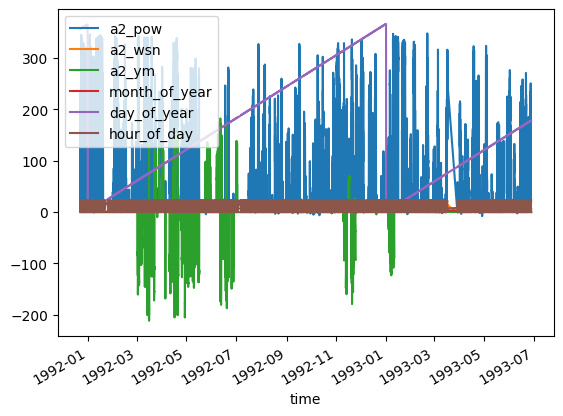

In [39]:
a2_df.plot()

In [40]:
a2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72577 entries, 1991-12-22 23:36:00 to 1993-06-27 23:13:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   a2_pow         72577 non-null  float64
 1   a2_wsn         72577 non-null  float64
 2   a2_ym          72577 non-null  float64
 3   month_of_year  72577 non-null  int64  
 4   day_of_year    72577 non-null  int64  
 5   hour_of_day    72577 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 3.9 MB


In [41]:
a2_df["target"] = a2_df["a2_pow"].shift(-6)
a2_df = a2_df.fillna(0)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score

from lightgbm import LGBMRegressor

In [43]:
X = a2_df.drop(["target", "a2_pow"], axis=1)
y = a2_df["target"].tolist()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train

,a2_wsn,a2_ym,month_of_year,day_of_year,hour_of_day
time,,,,,
1992-09-15 09:06:00,6.33,0.0,9,259,9
1993-01-06 03:53:00,0.00,0.0,1,6,3
1992-04-23 15:32:00,0.00,0.0,4,114,15
1992-10-15 10:35:00,0.00,0.0,10,289,10
1992-09-13 08:59:00,7.78,0.0,9,257,8
...,...,...,...,...,...
1992-10-04 02:46:00,0.00,0.0,10,278,2
1992-02-16 16:32:00,0.00,0.0,2,47,16
1993-02-10 07:16:00,0.00,0.0,2,41,7


In [46]:
model = LGBMRegressor().fit(X_train, y_train)

y_hat = model.predict(X_test)

r2, mse = r2_score(y_test, y_hat), mean_squared_error(y_test, y_hat)
print(r2, mse)

0.6401585526964979 1863.7532749378074


In [47]:
model.feature_importances_

array([ 613,  248,  126, 1247,  766])

In [49]:
!py -3.9 -m pip install flaml

  Obtaining dependency information for flaml from https://files.pythonhosted.org/packages/e6/5e/f26990e3007c891132c7daec69059c916cc521749451cada3aae27e2f611/FLAML-2.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/295.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/295.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 295.2/295.2 kB 3.7 MB/s eta 0:00:00


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from flaml import AutoML
import numpy as np

automl_settings = {
    "time_budget": 600,  # in seconds
    "metric": "mse",
    "task": "regression",
    "log_file_name": "blueberry.log",
}

automl = AutoML()
automl.fit(X_train, np.array(y_train), **automl_settings)

[flaml.automl.logger: 12-19 22:28:52] {1679} INFO - task = regression
[flaml.automl.logger: 12-19 22:28:52] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 12-19 22:28:52] {1788} INFO - Minimizing error metric: mse
[flaml.automl.logger: 12-19 22:28:52] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 12-19 22:28:52] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-19 22:28:52] {2344} INFO - Estimated sufficient time budget=2274s. Estimated necessary time budget=16s.
[flaml.automl.logger: 12-19 22:28:52] {2391} INFO -  at 0.3s,	estimator lgbm's best error=3769.0889,	best estimator lgbm's best error=3769.0889
[flaml.automl.logger: 12-19 22:28:52] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-19 22:28:52] {2391} INFO -  at 0.5s,	estimator lgbm's best error=3769.0889,	best estimator lgbm's best error=3769.0889
[flaml.automl.logger: 12-19 22:28:52] {22

In [55]:
automl_y_hat = automl.predict(X_test)

r2, mse = r2_score(y_test, y_hat), mean_squared_error(y_test, y_hat)
print(r2, mse)

0.6401585526964979 1863.7532749378074
